- 어떤 규칙을 하나의 트리(tree) 형태로 표현한 후 이를 바탕으로 분류나 회귀 문제를 해결하는 알고리즘
- 딥러닝 기반을 제외한 전통적인 통계 기반의 머신러닝 모델 중 직관적이고 가장 실용성이 높은 모델 중 하나
- scikit-learn의 tree 서브모듈의 DecisionTreeClassifier()

## 로지스틱 회귀로 와인 분류하기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- https://raw.githubusercontent.com/rickiepark/hg-mldl/master/wine.csv

In [3]:
wine = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/wine.csv')

In [4]:
wine.head()
# 보니까 굳이 피쳐 스케일링 할 필요 없음
# class : 타깃
# 나머지는 input으로 쓸거야

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
wine.shape

(6497, 4)

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [7]:
wine.describe()
# 와인의 통계값
# class : 타깃값 보면 0과1로 이뤄져잇음

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [8]:
wine['class'].unique()
# 진짠지 확인

array([0., 1.])

In [9]:
wine['class'].value_counts()
# 1 : 화이트와인
# 2 : 레드와인 갯수확인
# 편향이 심한 편

1.0    4898
0.0    1599
Name: class, dtype: int64

In [10]:
wine_input = wine[['alcohol','sugar','pH']].to_numpy()
# 여러개니까 []안에 []리스트업
wine_target = wine['class'].to_numpy()

In [11]:
wine_input.shape, wine_target.shape
# 크기 확인

((6497, 3), (6497,))

## 훈련 세트와 테스트 세트로 분리

In [12]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    wine_input, wine_target, test_size = 0.2, random_state=42)

In [13]:
train_input.shape, test_input.shape
# 분할이 8:2로 잘 됏나 확인 

((5197, 3), (1300, 3))

### 피처 스케일링

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### 로지스틱 회귀 모델 구축하기

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=20)
# C의 기본값은 1이엇음
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

# 훈련세트와 테스트 점수 다 낮으니 과소적합을 의심할 수있다.
# (데이터가 적을지도?)

0.7804502597652492
0.7776923076923077


In [16]:
print(lr.coef_, lr.intercept_)
# 기울기와 절편

[[ 0.51474158  1.68381319 -0.6888729 ]] [1.82368541]


In [17]:
# predict 함수를 통해서 예측값보기

In [18]:
lr.predict(train_scaled[:5])

# 1:화이트와인

array([1., 1., 1., 1., 1.])

In [19]:
# 샘플이 너무 편향돼서 1 밖에 안뜸
# 이래서 70몇펴밖에 안뜬거

In [20]:
proba = lr.predict_proba(train_scaled[:5])
np.round(proba, decimals=4)
# 오른쪽의 양성 1값이 화이트와인
# 왼쪽 음성 0이 레드와인

array([[0.0613, 0.9387],
       [0.2172, 0.7828],
       [0.4072, 0.5928],
       [0.4529, 0.5471],
       [0.0052, 0.9948]])

In [21]:
decisions = lr.decision_function(train_scaled[:5])
decisions
# z값은 -무한대 +무한대로 가기때문에 이대로 못쓰고
# 로지스틱함수/시그모이드 함수를 통과시켜서 0~1사이 확률값으로 바꿔서 쓴다

array([2.72942974, 1.28226627, 0.37562053, 0.18907677, 5.25948544])

In [22]:
print(lr.coef_, lr.intercept_)
# 기울기와 절편
# 다섯개의 관측값에 대한 가중치(기울기)와 절편

[[ 0.51474158  1.68381319 -0.6888729 ]] [1.82368541]


수치형 - 연속형 이산형
</br>비수치형 - 문자형 범주형

In [23]:
# 시그모이드 함수를 통해 확률값 추출
# 공식은 얘가 갖고있다 굿
from scipy.special import expit
expit(decisions)
# 나온 확률값은 lr.predict_proba(train[:5])의 양성값(오른쪽)값과 똑같다
# 음성값은 1에서 양성값을 뺀것과 같다

array([0.93874105, 0.7828353 , 0.5928164 , 0.54712887, 0.9948289 ])

### 의사결정나무

In [26]:
from sklearn.tree import DecisionTreeClassifier
#                                       분류
dt = DecisionTreeClassifier(random_state=42)
# 아무 옵션도 안줘서 최대 트리로 형성될꺼임
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
# 지금은 이렇게 쓰지만 나중엔 이렇게 포맷을 만듦
# 반복하고 있으니까..
# 함수 만들어놓고 값만 바꾸는 식으로
# 확실히 높아졌음
# 과대적합 우려
# 이럴때 가지치기를 하는거

0.996921300750433
0.8592307692307692


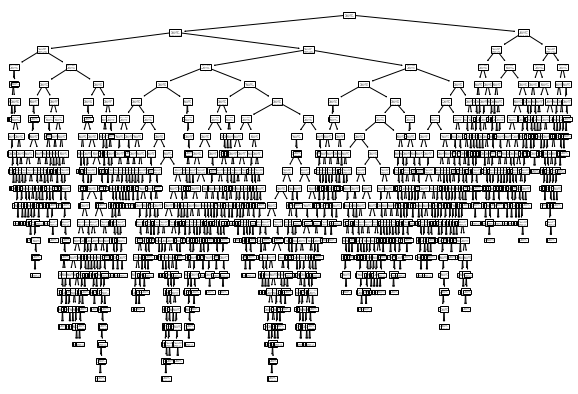

In [25]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

# 바로 시각화하기전에 이렇게 사이즈 조정을 한번 하더라고

- 지 징그러
- 가지가 이렇게 많은것.. 과대적합이 발생햇다는거
- 가지치기가 필요한 이유
- 어디에 가지를 쳐야하나 -> 비용함수

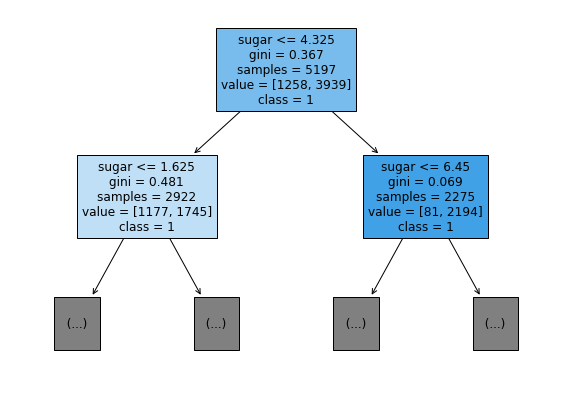

In [36]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names = ['alcohol', 'sugar', 'pH'], class_names=['0', '1'])
# filled : 클래스마다 색깔 다르게 주기
plt.show()
# sugar가 제일 영향을 많이 주나봐

- 지니불순도 : 1 - (음성클래스의 비율 제곱 + 양성 클래스의 비율 제곱)
1 - (0.24206272849720992^ + 0.7579372715027901^)

In [20]:
1258/5197

0.24206272849720992

In [23]:
3939/5197

0.7579372715027901

In [ ]:
# 불순도는 작을수록 정보 획득량(정보이득)은 증가한다
# (정보획득 = 1 - 자식들의 불순도(지니)의 합) 이라

### 가지치기(pruning)
- 최대 트리로 형성된 결정트리의 특정 노드 밑의 트리를 제거하여 일반화 성능을 높이는 것
- 과대적합을 막기위해 사용한다
- 더 많은 가지가 생기지 않도록 최대 깊이, leaf 노드의 최대개수, 한 노드가 분할하기 위한 최소 데이터 수를 제한한다

In [25]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

# 훈련데이터의 값이 줄어들었음
# 과대적합이 해소됐다
# 성능은 썩 좋아지지 않았음

0.8454877814123533
0.8415384615384616


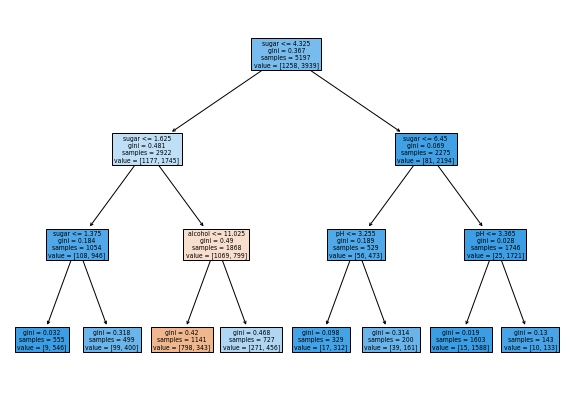

In [30]:
plt.figure(figsize=(10, 7))
plot_tree(dt, filled=True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()
# 다시 뽑아보기

- 확 줄어들었다
- 루트노드에 -값이 있네? 당도값이 마이너스가 나올 수 있나

In [28]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
# 우리가 이미 전처리된 데이터를 가지고 작업해서 그런가 싶어서 
# 스케일된거 말고 원본데이터를 가지고 해봄
# 근데 스케일이 아무 영향을 안끼친거 같음

0.8454877814123533
0.8415384615384616


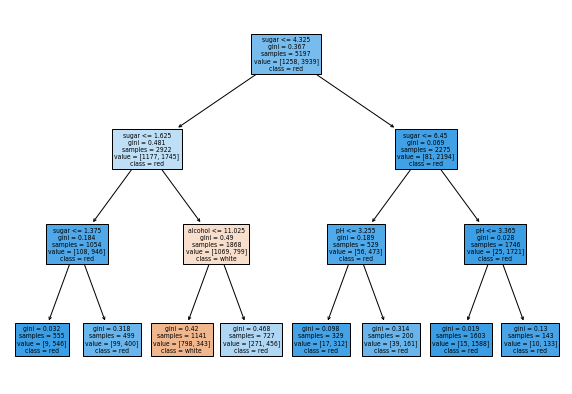

In [39]:
plt.figure(figsize=(10, 7))
plot_tree(dt, filled=True, feature_names = ['alcohol', 'sugar', 'pH'], class_names=['white','red'])
# 찾는값을 1로 (white wine을 찾는거니까)
plt.show()
# 시각화해보니 마이너스 없어짐

- yes면 왼쪽, no면 오른쪽으로 감
</br> 빨간색으로 나타난 노드만 레드와인으로 분류되고 나머지는 다 화이트 와인인거임
- 근데 루트노드에서 처음에 1258레드와인, 3939화이트와인으로 갈렸는데
</br> 내려갈수록 숫자가 안맞음.. 성능이 썩 좋진않음
</br> 결정나무는 직관적이고 간단해서 좋은 반면 성능은 뛰어나지않음
</br> 초창기에는 많이 썼으나
</br> 딥러닝 활성화이후에 잘 안쓰게 된 이유
</br> 이런 성능이 떨어지는 모델들을 합쳐서 쓰는게 앙상블
- 근데 왜 첫번째 조건으로 sugar가 들어갔을까 궁금해짐
</br> 결정트리를 구성하는 피쳐들중에 어떤 피쳐가 가장 중요한 영향을 미칠까
</br> sugar가 가장 영향력을 많이 갖고 있는걸까?
</br> 그걸 계산하는게 '특성 중요도'

In [34]:
# 특성 중요도 : 결정 트리는 어떤 특성이 가장 유용한지를 나타내는 특성 중요도를 계산해준다
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])

- 우리가 가진 피쳐가 세가지라 s가 붙음 순서도 정해져잇음
</br> 그 순서대로 중요도가 계산돼서 나옴
</br> alcohol, sugar, pH 순
</br> 다 더하면 1
- 특성중요도를 통해서 중요도가 낮은걸 제거하고 츄라이해볼수도 있음
</br> 결정트리의 장점 중 하나